In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs) 

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
 
    # Add 1 to the record count.
    record_count += 1

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | upernavik
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | tommot
Processing Record 4 of Set 1 | dudinka
Processing Record 5 of Set 1 | kavieng
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | leon valley
Processing Record 8 of Set 1 | havoysund
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | flinders
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | kruisfontein
Processing Record 15 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | fortuna
Processing Record 18 of Set 1 | vera cruz
Processing Record 19 of Set 1 | pahrump
Processing Record 20 of Set 1 | mahebourg
Processing Record 21 of Set 1 | portland
Processing Rec

Processing Record 38 of Set 4 | ulladulla
Processing Record 39 of Set 4 | sibolga
Processing Record 40 of Set 4 | beisfjord
Processing Record 41 of Set 4 | sobolevo
Processing Record 42 of Set 4 | glenwood springs
Processing Record 43 of Set 4 | san patricio
Processing Record 44 of Set 4 | gremyachinsk
Processing Record 45 of Set 4 | kidal
Processing Record 46 of Set 4 | mount isa
Processing Record 47 of Set 4 | hambantota
Processing Record 48 of Set 4 | salvador
Processing Record 49 of Set 4 | muros
Processing Record 50 of Set 4 | songkhla
Processing Record 1 of Set 5 | port moresby
Processing Record 2 of Set 5 | port hardy
Processing Record 3 of Set 5 | pevek
Processing Record 4 of Set 5 | kupang
Processing Record 5 of Set 5 | duldurga
Processing Record 6 of Set 5 | bilibino
Processing Record 7 of Set 5 | puerto escondido
Processing Record 8 of Set 5 | cayambe
Processing Record 9 of Set 5 | narsaq
Processing Record 10 of Set 5 | bontang
Processing Record 11 of Set 5 | quatre cocos
Pr

Processing Record 26 of Set 8 | karratha
Processing Record 27 of Set 8 | shelburne
Processing Record 28 of Set 8 | aleksandrovsk-sakhalinskiy
Processing Record 29 of Set 8 | dhidhdhoo
Processing Record 30 of Set 8 | plettenberg bay
Processing Record 31 of Set 8 | ambovombe
Processing Record 32 of Set 8 | ames
Processing Record 33 of Set 8 | lanzhou
Processing Record 34 of Set 8 | deltona
Processing Record 35 of Set 8 | liyang
Processing Record 36 of Set 8 | ilo
Processing Record 37 of Set 8 | pidhorodne
Processing Record 38 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 39 of Set 8 | davila
Processing Record 40 of Set 8 | rio gallegos
Processing Record 41 of Set 8 | aklavik
Processing Record 42 of Set 8 | dunedin
Processing Record 43 of Set 8 | manoel urbano
Processing Record 44 of Set 8 | carlsbad
Processing Record 45 of Set 8 | hoquiam
Processing Record 46 of Set 8 | pochutla
Processing Record 47 of Set 8 | baza
Processing Record 48 of Set 8 | malakal
Processi

Processing Record 13 of Set 12 | tagusao
Processing Record 14 of Set 12 | marquette
Processing Record 15 of Set 12 | senanga
Processing Record 16 of Set 12 | saint-ambroise
Processing Record 17 of Set 12 | aliwal north
Processing Record 18 of Set 12 | shelopugino
Processing Record 19 of Set 12 | lakhnadon
Processing Record 20 of Set 12 | sainte-anne-des-monts
Processing Record 21 of Set 12 | codrington
Processing Record 22 of Set 12 | parral
Processing Record 23 of Set 12 | ternate
Processing Record 24 of Set 12 | chunoyar
Processing Record 25 of Set 12 | svetlogorsk
Processing Record 26 of Set 12 | mapiripan
Processing Record 27 of Set 12 | tazovskiy
Processing Record 28 of Set 12 | marijampole
Processing Record 29 of Set 12 | na klang
Processing Record 30 of Set 12 | steamboat springs
Processing Record 31 of Set 12 | lamu
Processing Record 32 of Set 12 | tete
Processing Record 33 of Set 12 | omboue
Processing Record 34 of Set 12 | mariinsk
Processing Record 35 of Set 12 | bayan
Proce

In [7]:
city_data

[{'City': 'Upernavik',
  'Lat': 72.7868,
  'Lng': -56.1549,
  'Max Temp': 24.55,
  'Humidity': 88,
  'Cloudiness': 100,
  'Wind Speed': 5.93,
  'Country': 'GL',
  'Date': '2021-12-06 14:07:30'},
 {'City': 'Avarua',
  'Lat': -21.2078,
  'Lng': -159.775,
  'Max Temp': 78.85,
  'Humidity': 89,
  'Cloudiness': 75,
  'Wind Speed': 6.91,
  'Country': 'CK',
  'Date': '2021-12-06 14:07:30'},
 {'City': 'Tommot',
  'Lat': 58.9564,
  'Lng': 126.2925,
  'Max Temp': -9.09,
  'Humidity': 97,
  'Cloudiness': 82,
  'Wind Speed': 5.1,
  'Country': 'RU',
  'Date': '2021-12-06 14:07:31'},
 {'City': 'Dudinka',
  'Lat': 69.4058,
  'Lng': 86.1778,
  'Max Temp': -9.38,
  'Humidity': 98,
  'Cloudiness': 100,
  'Wind Speed': 20.54,
  'Country': 'RU',
  'Date': '2021-12-06 14:07:31'},
 {'City': 'Kavieng',
  'Lat': -2.5744,
  'Lng': 150.7967,
  'Max Temp': 79.5,
  'Humidity': 91,
  'Cloudiness': 100,
  'Wind Speed': 18.32,
  'Country': 'PG',
  'Date': '2021-12-06 14:07:31'},
 {'City': 'Jamestown',
  'Lat': 42.09

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Upernavik,72.7868,-56.1549,24.55,88,100,5.93,GL,2021-12-06 14:07:30
1,Avarua,-21.2078,-159.7750,78.85,89,75,6.91,CK,2021-12-06 14:07:30
2,Tommot,58.9564,126.2925,-9.09,97,82,5.10,RU,2021-12-06 14:07:31
3,Dudinka,69.4058,86.1778,-9.38,98,100,20.54,RU,2021-12-06 14:07:31
4,Kavieng,-2.5744,150.7967,79.50,91,100,18.32,PG,2021-12-06 14:07:31
5,Jamestown,42.0970,-79.2353,51.71,94,90,5.99,US,2021-12-06 14:07:32
6,Leon Valley,29.4952,-98.6186,71.44,93,90,3.00,US,2021-12-06 14:07:32
7,Havoysund,70.9963,24.6622,28.63,96,100,15.66,NO,2021-12-06 14:07:32
8,Kapaa,22.0752,-159.3190,73.38,87,90,5.75,US,2021-12-06 14:07:32
9,Vaini,-21.2000,-175.2000,77.16,88,75,9.22,TO,2021-12-06 14:07:33


In [9]:
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upernavik,GL,2021-12-06 14:07:30,72.7868,-56.1549,24.55,88,100,5.93
1,Avarua,CK,2021-12-06 14:07:30,-21.2078,-159.7750,78.85,89,75,6.91
2,Tommot,RU,2021-12-06 14:07:31,58.9564,126.2925,-9.09,97,82,5.10
3,Dudinka,RU,2021-12-06 14:07:31,69.4058,86.1778,-9.38,98,100,20.54
4,Kavieng,PG,2021-12-06 14:07:31,-2.5744,150.7967,79.50,91,100,18.32
5,Jamestown,US,2021-12-06 14:07:32,42.0970,-79.2353,51.71,94,90,5.99
6,Leon Valley,US,2021-12-06 14:07:32,29.4952,-98.6186,71.44,93,90,3.00
7,Havoysund,NO,2021-12-06 14:07:32,70.9963,24.6622,28.63,96,100,15.66
8,Kapaa,US,2021-12-06 14:07:32,22.0752,-159.3190,73.38,87,90,5.75
9,Vaini,TO,2021-12-06 14:07:33,-21.2000,-175.2000,77.16,88,75,9.22


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

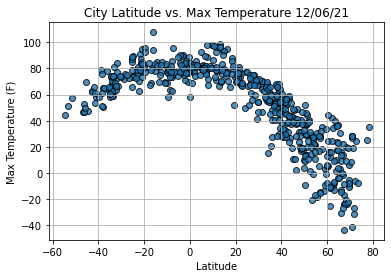

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

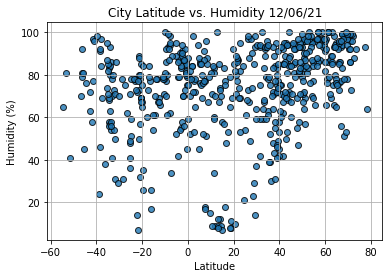

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

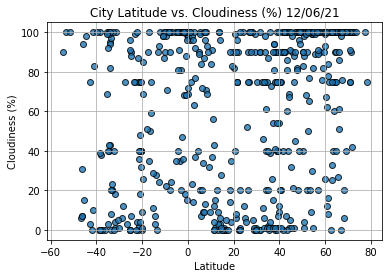

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

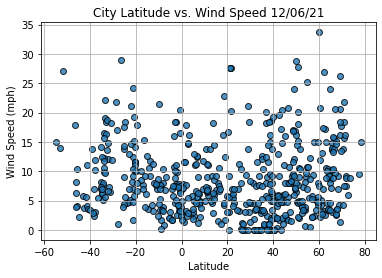

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates) :
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

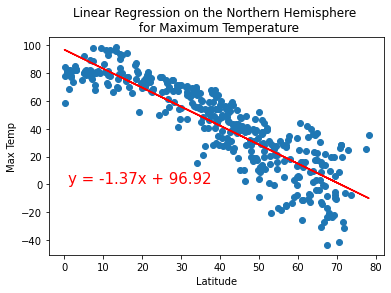

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(1,1))

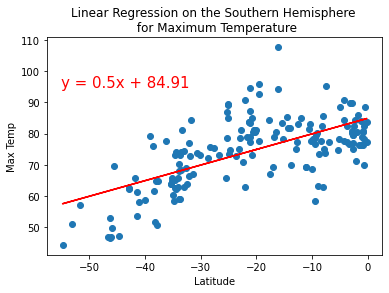

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-55,95))

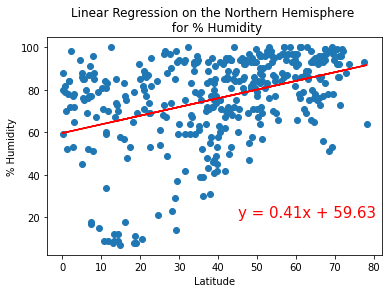

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(45,20))

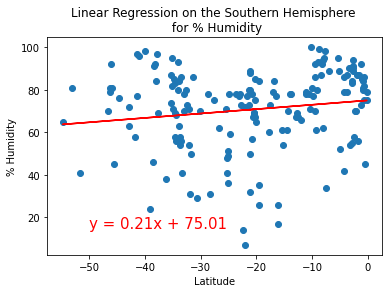

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

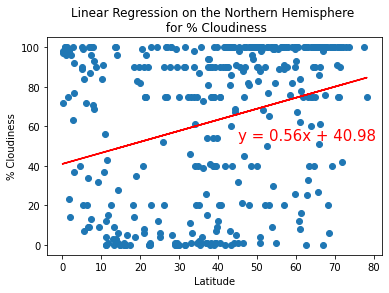

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(45,53))

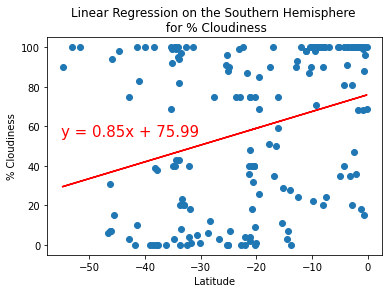

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55,55))

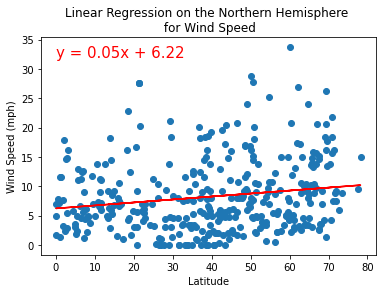

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(0,32))

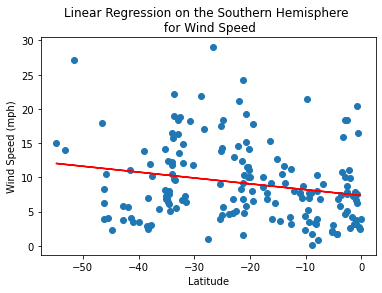

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(-55,55))